In [1]:
import ssl
# For data loading and manipulation
from sklearn.datasets import fetch_openml
import numpy as np

# For building and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluation and visualization
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt




In [2]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
#Load data from https://www.openml.org/d/554
#X contains the images data (features), y contains the labels (digit)
print("Fetching MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target
print("Data loaded successfully.") 
print(f"data shape : {X.shape}, labels shape: {y.shape}")

Fetching MNIST dataset...
Data loaded successfully.
data shape : (70000, 784), labels shape: (70000,)


In [4]:
# Split dataset into test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

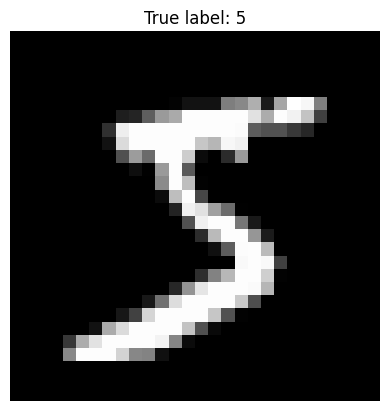

In [6]:
some_digit_index = 0
some_digit_image = X[some_digit_index].reshape(28, 28)
true_label = y[some_digit_index]

plt.imshow(some_digit_image, cmap='gray')
plt.title(f"True label: {true_label}")
plt.axis('off')
plt.show()